<a href="https://colab.research.google.com/github/divyakumar95/ProgrammingDA_CA/blob/main/Prog_Da_CA02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%sh
curl https://packages.microsoft.com/keys/microsoft.asc | apt-key add -
curl https://packages.microsoft.com/config/ubuntu/16.04/prod.list > /etc/apt/sources.list.d/mssql-release.list
sudo apt-get update
sudo ACCEPT_EULA=Y apt-get -q -y install msodbcsql17

In [ ]:
!pip -q install pypyodbc

Add API key path

In [108]:
import requests,json

api_key_path = '/content/drive/MyDrive/DataAnalytics/tmdb_apikey.txt'
with open(api_key_path,'r+') as f:
  api_key = f.read()

Define pull data function --> Input number of pages to get from API

In [111]:
def pull_data(pages):
  resp_list = []
  for i in range(1,pages):
    Full_url = 'https://api.themoviedb.org/3/movie/top_rated?api_key='+api_key+'&language=en-US&page='+str(i)
    resp = requests.get(Full_url)
    x = resp.json()
    resp_list.append(x)
  return resp_list

resp = pull_data(20)

Checking all the columns present in results

In [114]:
data_columns = resp[0]['results'][0].keys()
print(data_columns)

dict_keys(['adult', 'backdrop_path', 'genre_ids', 'id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'release_date', 'title', 'video', 'vote_average', 'vote_count'])


Creating empty dataframe withe the required columns

In [116]:
import pandas as pd
emptyDf = pd.DataFrame(columns=data_columns)
emptyDf

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count


Push all the data into the dataframe

In [143]:
def inserting_data(a,pd_data):
  for i in range(len(a)):
    for j in range(len(a[i]['results'])):
      hel = a[i]['results'][j]
      pd_data = pd_data.append(hel, ignore_index=True)
  return pd_data

data = inserting_data(resp,emptyDf)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   adult              380 non-null    object 
 1   backdrop_path      378 non-null    object 
 2   genre_ids          380 non-null    object 
 3   id                 380 non-null    object 
 4   original_language  380 non-null    object 
 5   original_title     380 non-null    object 
 6   overview           380 non-null    object 
 7   popularity         380 non-null    float64
 8   poster_path        380 non-null    object 
 9   release_date       380 non-null    object 
 10  title              380 non-null    object 
 11  video              380 non-null    object 
 12  vote_average       380 non-null    float64
 13  vote_count         380 non-null    object 
dtypes: float64(2), object(12)
memory usage: 41.7+ KB


### Columns Description
* poster_path: movie poster path
* adult: Adult type movie - Boolean 
* overview: Movie Overview
* release_date: Movie release date
* genre_ids: Movie Genre
* id: unique movie ids
* original_title: Movie original title
* original_language: Movie language
* title: Movie title
* backdrop_path: Movie background poster for webpage path
* popularity: Movie Popularity
* vote_count: Number of votes for movie
* video: check for trailer - Boolean
* vote_average: Average votes

Genre Ids description: (Source - https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee)

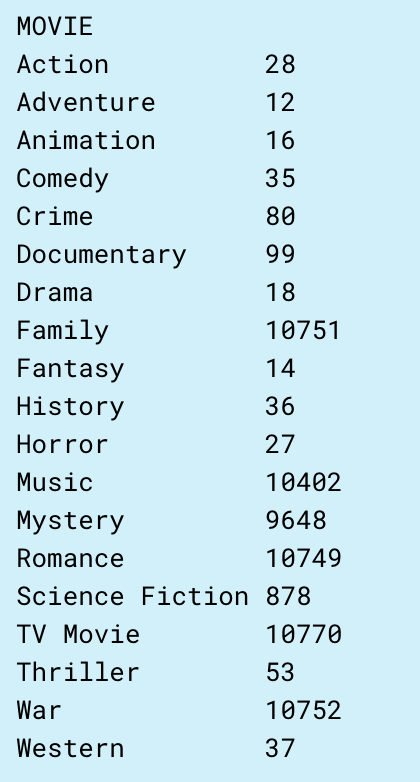

In [144]:
data.tail(2)

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count
378,False,/umUyVxJ4HeNebLMAcScdhF0QB3h.jpg,"[18, 36]",76203,en,12 Years a Slave,"In the pre-Civil War United States, Solomon No...",23.624,/xdANQijuNrJaw1HA61rDccME4Tm.jpg,2013-10-18,12 Years a Slave,False,7.9,9333
379,False,/7amSQSipxgiQnEejWX6iQonFrZI.jpg,"[18, 10749]",946,en,Letter from an Unknown Woman,A pianist about to flee from a duel receives a...,6.195,/54JBMKw2uREbDviTvCerAePkzda.jpg,1948-04-28,Letter from an Unknown Woman,False,7.9,206


In [136]:
#data['genre_ids'].to_list()

In [145]:
genre_df = pd.DataFrame(data['genre_ids'].to_list(),columns=['genre1','genre2','genre3','genre4','genre5','genre6'])

In [146]:
genre_df = genre_df.fillna(0)
genre_df.head()

,genre1,genre2,genre3,genre4,genre5,genre6
0,35,18.0,10749.0,0.0,0.0,0.0
1,18,80.0,0.0,0.0,0.0,0.0
2,18,80.0,0.0,0.0,0.0,0.0
3,28,12.0,878.0,0.0,0.0,0.0
4,10749,0.0,0.0,0.0,0.0,0.0


In [147]:
data = pd.concat([data,genre_df],axis=1)

In [148]:
data = data.drop(['backdrop_path','genre_ids','poster_path','original_title'],axis=1)
data.head()


,adult,id,original_language,overview,popularity,release_date,title,video,vote_average,vote_count,genre1,genre2,genre3,genre4,genre5,genre6
0,False,19404,hi,"Raj is a rich, carefree, happy-go-lucky second...",20.077,1995-10-20,Dilwale Dulhania Le Jayenge,False,8.7,3283,35,18.0,10749.0,0.0,0.0,0.0
1,False,278,en,Framed in the 1940s for the double murder of h...,61.015,1994-09-23,The Shawshank Redemption,False,8.7,20308,18,80.0,0.0,0.0,0.0,0.0
2,False,238,en,"Spanning the years 1945 to 1955, a chronicle o...",60.333,1972-03-14,The Godfather,False,8.7,15188,18,80.0,0.0,0.0,0.0,0.0
3,False,634649,en,Peter Parker is unmasked and no longer able to...,21848.810,2021-12-15,Spider-Man: No Way Home,False,8.7,1414,28,12.0,878.0,0.0,0.0,0.0
4,False,724089,en,Professor Gabriel Emerson finally learns the t...,32.425,2020-07-31,Gabriel's Inferno Part II,False,8.7,1353,10749,0.0,0.0,0.0,0.0,0.0


In [150]:
data['release_date'] = pd.to_datetime(data["release_date"])

In [151]:
data.head(2)

,adult,id,original_language,overview,popularity,release_date,title,video,vote_average,vote_count,genre1,genre2,genre3,genre4,genre5,genre6
0,False,19404,hi,"Raj is a rich, carefree, happy-go-lucky second...",20.077,1995-10-20,Dilwale Dulhania Le Jayenge,False,8.7,3283,35,18.0,10749.0,0.0,0.0,0.0
1,False,278,en,Framed in the 1940s for the double murder of h...,61.015,1994-09-23,The Shawshank Redemption,False,8.7,20308,18,80.0,0.0,0.0,0.0,0.0


Check for Nan's in dataset

In [152]:
data.isna().sum()

adult                0
id                   0
original_language    0
overview             0
popularity           0
release_date         0
title                0
video                0
vote_average         0
vote_count           0
genre1               0
genre2               0
genre3               0
genre4               0
genre5               0
genre6               0
dtype: int64

In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   adult              380 non-null    object        
 1   id                 380 non-null    object        
 2   original_language  380 non-null    object        
 3   overview           380 non-null    object        
 4   popularity         380 non-null    float64       
 5   release_date       380 non-null    datetime64[ns]
 6   title              380 non-null    object        
 7   video              380 non-null    object        
 8   vote_average       380 non-null    float64       
 9   vote_count         380 non-null    object        
 10  genre1             380 non-null    int64         
 11  genre2             380 non-null    float64       
 12  genre3             380 non-null    float64       
 13  genre4             380 non-null    float64       
 14  genre5    